In [1]:
#Data Lib's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#NLP Text Lib's
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\HP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#EDA

# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [4]:
# Feature Engineering

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [5]:
# Model Building
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
arview = pd.read_csv("amazon_mobile.csv")

In [7]:
arview.shape

(500, 10)

In [8]:
arview.isnull().sum()

Name                                    0
Age Group                               0
Mobile brand                            0
Price Range                             0
Mobile Color                            0
Mobile Phone Operating System           0
Mobile Phone Internal Storage Memory    0
Product Review                          0
 Mobile Ratings                         0
Amazon Product Ratings                  0
dtype: int64

In [9]:
arview.describe

<bound method NDFrame.describe of                  Name Age Group Mobile brand    Price Range Mobile Color  \
0         Anusuya.N.A     20-25         Vivo  10,000-20,000         Blue   
1           Abirami.R     25-30         Oppo  20,000-30,000          Red   
2             SARVESH     15-20         Vivo   5,000-10,000         Blue   
3             Arthi.P     20-25        Redmi   5,000-10,000    Rose pink   
4             Arthi.V     20-25       Xiaomi  20,000-30,000        Black   
..                ...       ...          ...            ...          ...   
495           Uma 115        38         Vivo  30,000-45,000        White   
496           Mani 78     20-25        Redmi  10,000-20,000        Black   
497          Daya 113     20-25      Samsung  10,000-20,000        Blue    
498         Shiney 59     20-25      Samsung  30,000-45,000        White   
499  Navven Balaji 55     20-25         Vivo  20,000-30,000         Blue   

    Mobile Phone Operating System Mobile Phone Intern

In [10]:
arview.head()

,Name,Age Group,Mobile brand,Price Range,Mobile Color,Mobile Phone Operating System,Mobile Phone Internal Storage Memory,Product Review,Mobile Ratings,Amazon Product Ratings
0,Anusuya.N.A,20-25,Vivo,"10,000-20,000",Blue,Android,32 GB,Price Worthy;Amazing features;The fast chargin...,4,4
1,Abirami.R,25-30,Oppo,"20,000-30,000",Red,Android,32 GB,Price Worthy;Amazing features;A cute mobile su...,4,4
2,SARVESH,15-20,Vivo,"5,000-10,000",Blue,Android,4 GB,Price Worthy;A cute mobile super performance a...,3,3
3,Arthi.P,20-25,Redmi,"5,000-10,000",Rose pink,Android,8 GB,Price Worthy;Poor front camera and battery;Ama...,3,4
4,Arthi.V,20-25,Xiaomi,"20,000-30,000",Black,Android,16 GB,Price Worthy;Poor front camera and battery;Not...,3,4


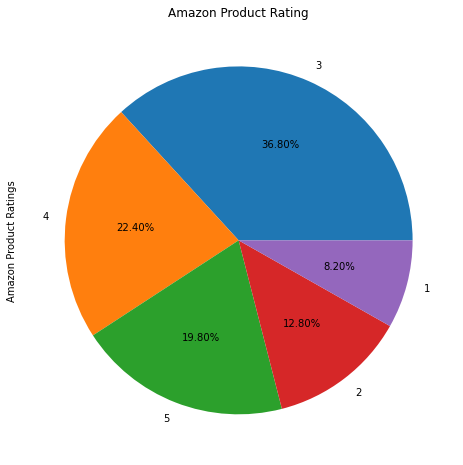

In [11]:
arview['Amazon Product Ratings'].value_counts().plot(kind = 'pie', legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Amazon Product Rating", loc = "center")
plt.show()

In [12]:
#Labelling Products Based On Ratings Given

def Labelling(Rows):
  if(Rows["Amazon Product Ratings"] >= 4):
    Label = "Positive"
  elif(Rows["Amazon Product Ratings"] <=2):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [13]:
arview['sentiment']=arview.apply(Labelling, axis = 1)

In [14]:
arview['sentiment'].value_counts()

Positive    211
Neutral     184
Negative    105
Name: sentiment, dtype: int64

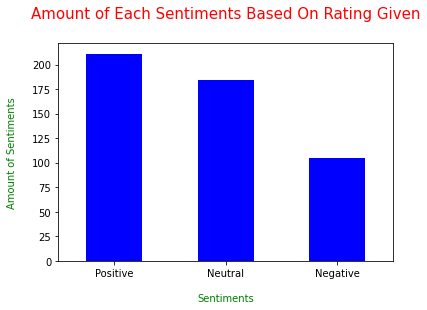

In [15]:
arview["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
#Text Preprocessing


In [16]:
#Text Cleaning

def Text_Cleaning(Text):
    # Lowercase the texts
    Text = Text.lower()

    # Cleaning punctuations in the text
    punc = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    Text = Text.translate(punc)

    # Removing numbers in the text
    Text = re.sub(r'\d+', '', Text)

    # Remove possible links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

    # Deleting newlines
    Text = re.sub('\n', '', Text)

    return Text


In [17]:
#Text Processing

# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english"))
def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords
                      
  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [18]:
#Applying The Functions

arview['Product Review '] = arview['Product Review '].apply(lambda Text: Text_Cleaning(Text))


In [19]:
arview['Product Review '] = arview['Product Review '].apply(lambda Text: Text_Processing(Text))

In [20]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

In [ ]:
nltk.download('punkt_tab')

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
import nltk
nltk.download()

In [21]:
#Exploratory Data Analysis

#Polarity

arview["polarity"] = arview["Product Review "].map(lambda Text: TextBlob(Text).sentiment.polarity)

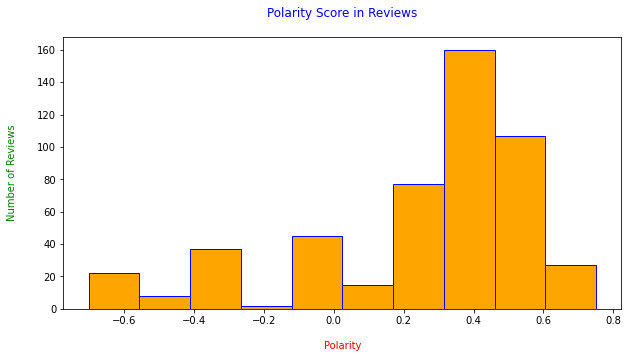

In [22]:
arview["polarity"].plot(kind = "hist", bins = 10, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Number of Reviews", labelpad = 20, color = "green")

plt.show()

In [23]:
#Length 

arview["length"] = arview["Product Review "].astype(str).apply(len)

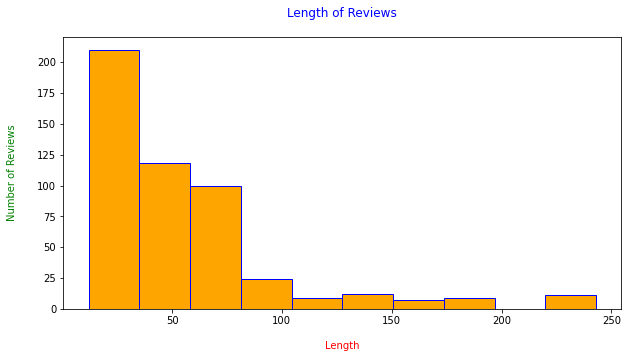

In [24]:
arview["length"].plot(kind = "hist", bins = 10, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Number of Reviews", labelpad = 20, color = "green")

plt.show()

In [25]:
#Word
arview["word_counts"] = arview["Product Review "].apply(lambda x: len(str(x).split()))

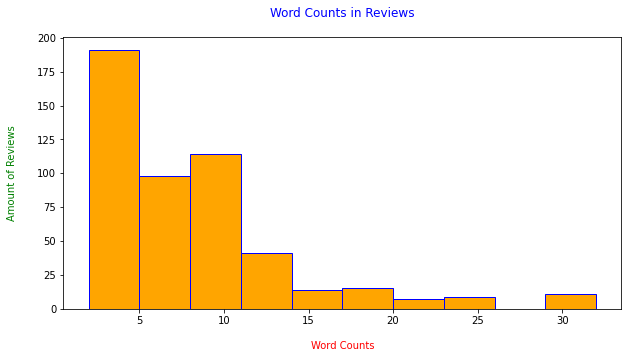

In [26]:
arview["word_counts"].plot(kind = "hist", bins = 10, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
# N Gram

In [27]:
# ✅ Define Gram_Analysis function (Corrected)
def Gram_Analysis(Corpus, Gram, N):
    # Using built-in stop words or your own list (optional)
    stop_words_list = 'english'  # or list of custom words
    
    # Vectorizer setup
    Vectorizer = CountVectorizer(
        ngram_range=(Gram, Gram),
        stop_words=stop_words_list,  # Must be 'english', list, or None
        max_features=N
    )
    
    # Fit and transform the corpus
    ngrams = Vectorizer.fit_transform(Corpus)
    
    # Extract vocabulary and counts
    count_values = ngrams.toarray().sum(axis=0)
    vocab = Vectorizer.get_feature_names_out()
    
    # Combine into list of tuples (word, count)
    freq_distribution = list(zip(vocab, count_values))
    
    # Sort descending by counts
    sorted_ngrams = sorted(freq_distribution, key=lambda x: x[1], reverse=True)
    
    return sorted_ngrams



In [28]:
# Use dropna() so the base DataFrame is not affected
Positive = arview[arview["sentiment"] == "Positive"].dropna()
Neutral = arview[arview["sentiment"] == "Neutral"].dropna()
Negative = arview[arview["sentiment"] == "Negative"].dropna()

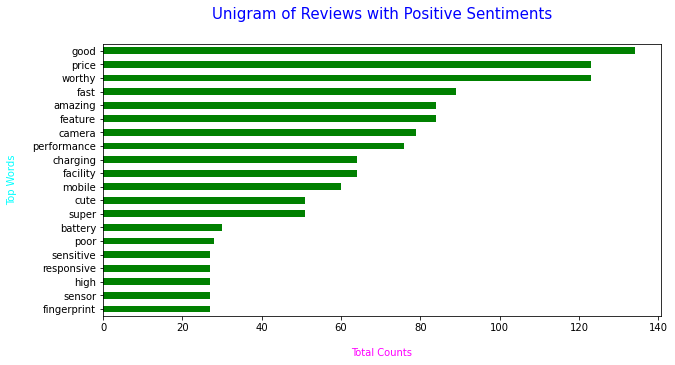

In [29]:
# ✅ Finding Unigram
words = Gram_Analysis(Positive["Product Review "], 1, 20)
Unigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="green"
)

# Customize plot
plt.title("Unigram of Reviews with Positive Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

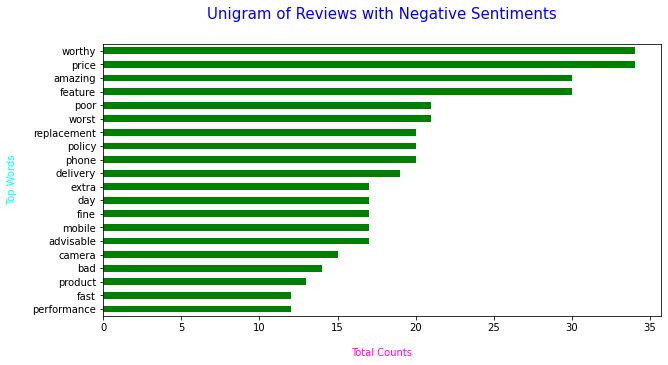

In [30]:
# ✅ Finding Unigram
words = Gram_Analysis(Negative["Product Review "], 1, 20)
Unigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="green"
)

# Customize plot
plt.title("Unigram of Reviews with Negative Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

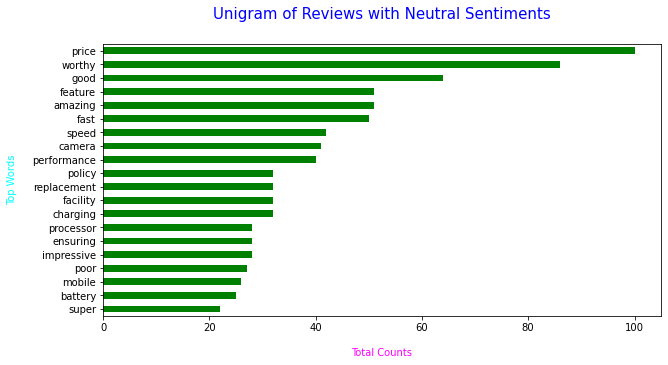

In [31]:
# ✅ Finding Unigram
words = Gram_Analysis(Neutral["Product Review "], 1, 20)
Unigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="green"
)

# Customize plot
plt.title("Unigram of Reviews with Neutral Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

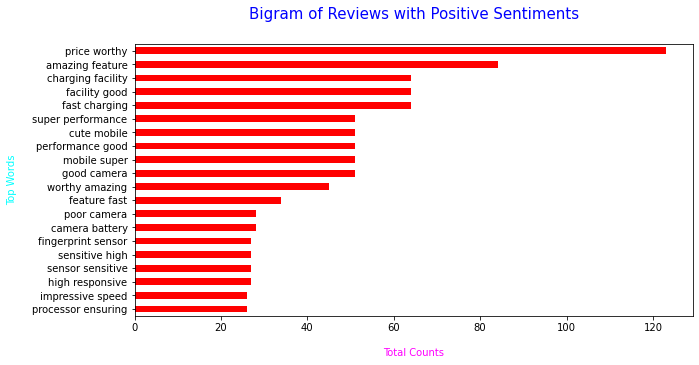

In [32]:
# ✅ Finding Bigram
words = Gram_Analysis(Positive["Product Review "], 2, 20)
Bigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="red"
)

# Customize plot
plt.title("Bigram of Reviews with Positive Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

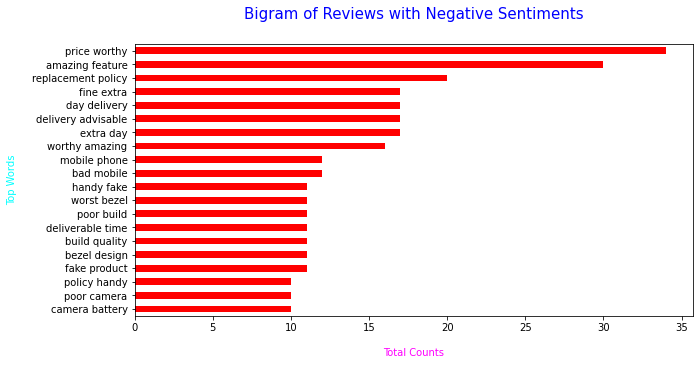

In [33]:
# ✅ Finding Bigram
words = Gram_Analysis(Negative["Product Review "], 2, 20)
Bigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="red"
)

# Customize plot
plt.title("Bigram of Reviews with Negative Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

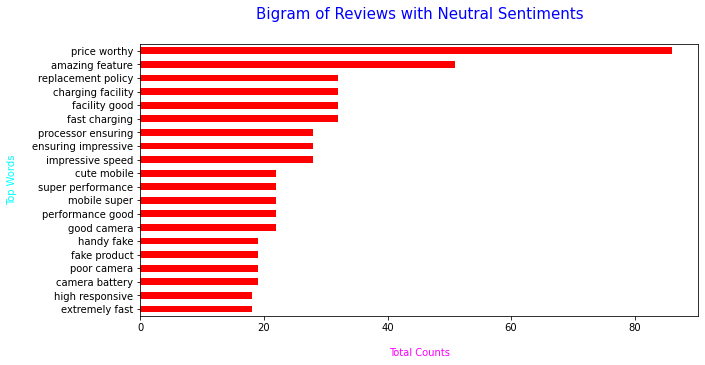

In [34]:
# ✅ Finding Bigram
words = Gram_Analysis(Neutral["Product Review "], 2, 20)
Bigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="red"
)

# Customize plot
plt.title("Bigram of Reviews with Neutral Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

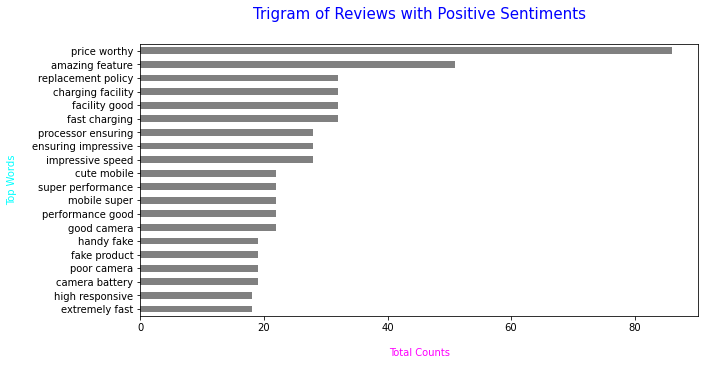

In [35]:
# ✅ Finding Bigram
words = Gram_Analysis(Positive["Product Review "], 3, 20)
Trigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="grey"
)

# Customize plot
plt.title("Trigram of Reviews with Positive Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

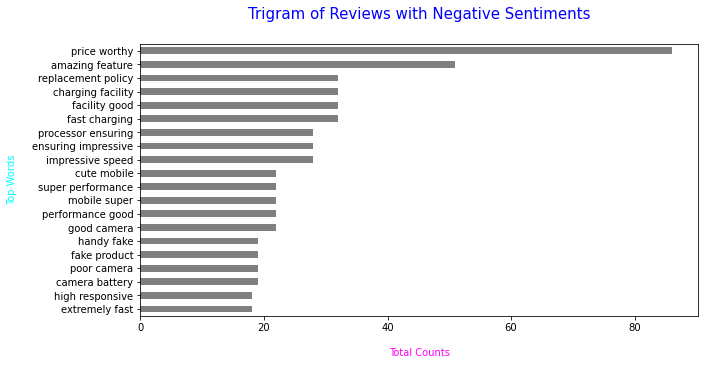

In [36]:
# ✅ Finding Bigram
words = Gram_Analysis(Negative["Product Review "], 3, 20)
Trigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="grey"
)

# Customize plot
plt.title("Trigram of Reviews with Negative Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

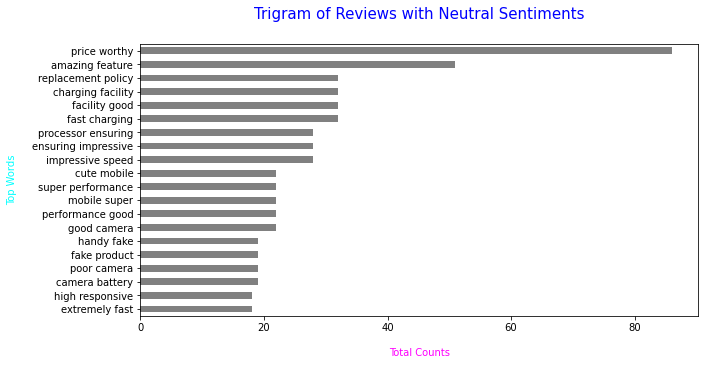

In [37]:
# ✅ Finding Bigram
words = Gram_Analysis(Neutral["Product Review "], 3, 20)
Trigram = pd.DataFrame(words, columns=["Words", "Counts"])

# ✅ Visualization
plt.figure(figsize=(10, 5))
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh",
    color="grey"
)

# Customize plot
plt.title("Trigram of Reviews with Neutral Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.xticks(rotation=0)

# Show plot
plt.show()

In [38]:
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK (if you haven't already)
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

# Now you can proceed with your text processing

[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


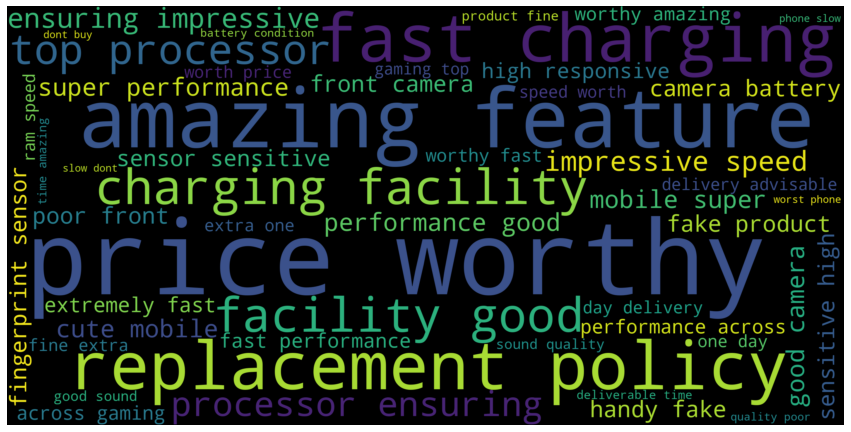

In [39]:
# Download stopwords from NLTK (if you haven't already)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and preprocess the text
text = " ".join(Neutral["Product Review "].dropna())  # Join the reviews into a single string

# Generate the word cloud
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=stop_words).generate(text)

# Plot the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


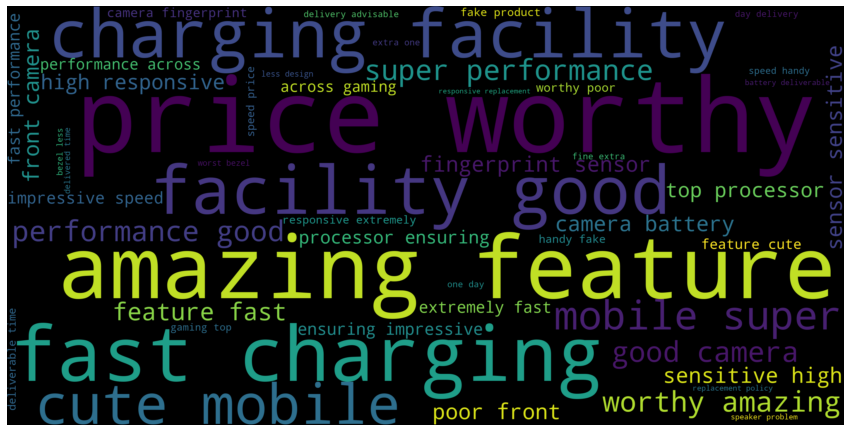

In [40]:
# Download stopwords from NLTK (if you haven't already)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and preprocess the text
text = " ".join(Positive["Product Review "].dropna())  # Join the reviews into a single string

# Generate the word cloud
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=stop_words).generate(text)

# Plot the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


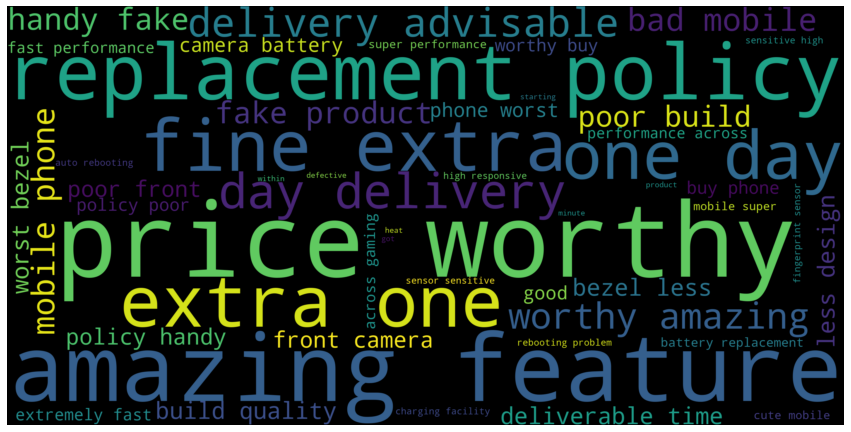

In [41]:
# Download stopwords from NLTK (if you haven't already)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and preprocess the text
text = " ".join(Negative["Product Review "].dropna())  # Join the reviews into a single string

# Generate the word cloud
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=stop_words).generate(text)

# Plot the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [42]:
#Feature Engineering

#Drop Insignificant Columns

Columns = ['Name', 'Age Group', 'Mobile brand', 'Price Range', 'Mobile Color',
       'Mobile Phone Operating System', 'Mobile Phone Internal Storage Memory',
        ' Mobile Ratings', 'Amazon Product Ratings',
        'polarity', 'length', 'word_counts']
  
arview.drop(columns = Columns, axis = 1, inplace = True)

In [43]:
#Current State of The Dataset

arview.head()

,Product Review,sentiment
0,price worthy amazing feature fast charging fac...,Positive
1,price worthy amazing feature cute mobile super...,Positive
2,price worthy cute mobile super performance goo...,Neutral
3,price worthy poor front camera battery amazing...,Positive
4,price worthy poor front camera battery deliver...,Positive


In [44]:
#Encoding Our Target Variable

Encoder = LabelEncoder()
arview["sentiment"] = Encoder.fit_transform(arview["sentiment"])

#convert categorical data into number

In [45]:
arview["sentiment"].value_counts()

2    211
1    184
0    105
Name: sentiment, dtype: int64

In [46]:
#TF-IDF Vectorizer

# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(arview["Product Review "])

# Check our matrix shape
X.shape

(500, 181)

In [47]:
# Declaring our target variable
y = arview["sentiment"]

In [48]:
# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
!pip install imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE  # Example import

In [50]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 211, 1: 184, 0: 105})
Resampled dataset shape Counter({2: 211, 1: 211, 0: 211})


In [51]:
Counter(y_res)

Counter({2: 211, 1: 211, 0: 211})

In [52]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.10, random_state=0)

In [ ]:
# Model Building

In [53]:
from sklearn.naive_bayes import BernoulliNB

In [54]:
from sklearn.svm import SVC as SVCModel 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Correct: Passing an instance of the class
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [10, 20]})

In [56]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.734
Decision Tree Test Accuracy: 0.8260000000000002
KNN Test Accuracy: 0.706
SVC Test Accuracy: 0.8180000000000002
Naive Bayes Test Accuracy: 0.5979999999999999


In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
#Hyperparameter Tuning

param_grid = {
    'C': np.logspace(-4, 4, 50),  # Regularization strength
    'penalty': ['l2'],             # Use 'l2' penalty for lbfgs solver
    'solver': ['lbfgs']            # Specify the solver
}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=2222.996482526191, random_state=0)
The mean accuracy of the model is: 0.875


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
#Best Model
logreg = LogisticRegression(C=1526.4179671752302, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


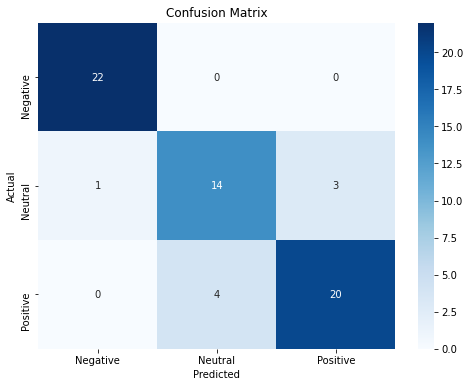

In [60]:
# Confusion Matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.78      0.78      0.78        18
           2       0.87      0.83      0.85        24

    accuracy                           0.88        64
   macro avg       0.87      0.87      0.87        64
weighted avg       0.87      0.88      0.87        64

